In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import folium

%matplotlib inline

In [2]:
rj = [-22.9068, -43.1729]

In [3]:
alunos = pd.read_csv("alunos.csv")
#alunos.astype('str')
alunos.head()

,Sexo,Instituição,Curso,Período,UF,Minicurso
0,F,UFRJ,Astronomia,>=8,RJ,2
1,F,UFRJ,Astronomia,5,RJ,JN
2,F,UFRJ,Astronomia,>=8,RJ,2
3,F,FAETEC-SP,Computação,6,SP,JN
4,M,IFRJ,Física,4,RJ,JN


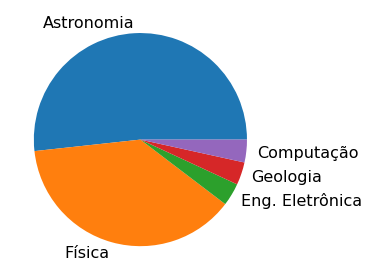

In [6]:
#cursos = alunos.groupby('Área').size().plot(kind='pie', fontsize=16)
alunos["Curso"].value_counts().plot(kind='pie', fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.savefig("cursos_all.png")

In [7]:
alunos["Curso"].value_counts()


Astronomia         15
Física             11
Eng. Eletrônica     1
Geologia            1
Computação          1
Name: Curso, dtype: int64

In [8]:
#cursos = alunos.groupby('Área').size().plot(kind='pie', fontsize=16)
alunos["Curso"][alunos["Curso"]!= "JN"].value_counts().plot(kind='pie', fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.savefig("cursos_ss.png")

KeyError: 'Área'

In [147]:
alunos["Área"][alunos["Curso"]!= "JN"].value_counts()

Astronomia    12
Física         6
Name: Área, dtype: int64

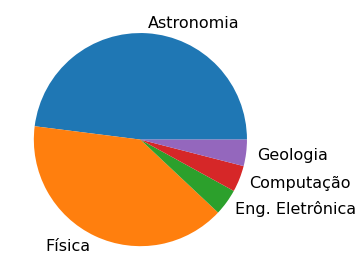

In [140]:
#cursos = alunos.groupby('Área').size().plot(kind='pie', fontsize=16)
alunos["Área"][alunos["Curso"]!= "SS"].value_counts().plot(kind='pie', fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.savefig("cursos_jn.png")

In [148]:
alunos["Área"][alunos["Curso"]!= "SS"].value_counts()

Astronomia         12
Física             10
Eng. Eletrônica     1
Computação          1
Geologia            1
Name: Área, dtype: int64

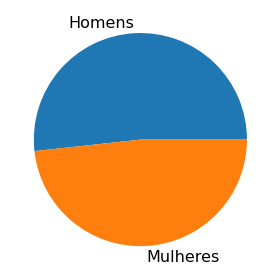

In [141]:
alunos["Sexo"].map({"F":"Mulheres", "M":"Homens"}).value_counts().plot(kind='pie', fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.savefig("sexo_all.png")

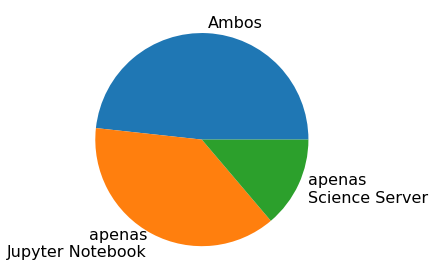

In [13]:
alunos["Minicurso"].map({"JN":"apenas\nJupyter Notebook", "SS":"apenas\nScience Server", "2":"Ambos"}).value_counts().plot(kind='pie', fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.savefig("minicurso_all.png")

In [16]:
alunos["Minicurso"].value_counts()


2     14
JN    11
SS     4
Name: Minicurso, dtype: int64

In [151]:
alunos["Sexo"].map({"F":"Mulheres", "M":"Homens"}).value_counts()

Homens      15
Mulheres    14
Name: Sexo, dtype: int64

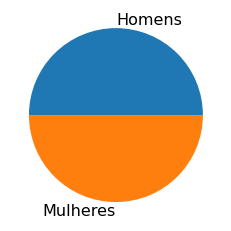

In [152]:
alunos["Sexo"][alunos["Curso"]!= "JN"].map({"F":"Mulheres", "M":"Homens"}).value_counts().plot(kind='pie', fontsize=16)
plt.ylabel("")
plt.savefig("sexo_ss.png")

In [153]:
alunos["Sexo"][alunos["Curso"]!= "JN"].map({"F":"Mulheres", "M":"Homens"}).value_counts()

Homens      9
Mulheres    9
Name: Sexo, dtype: int64

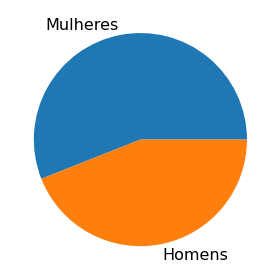

In [143]:
alunos["Sexo"][alunos["Curso"]!= "SS"].map({"F":"Mulheres", "M":"Homens"}).value_counts().plot(kind='pie', fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.savefig("sexo_jn.png")

In [154]:
alunos["Sexo"][alunos["Curso"]!= "SS"].map({"F":"Mulheres", "M":"Homens"}).value_counts()

Mulheres    14
Homens      11
Name: Sexo, dtype: int64

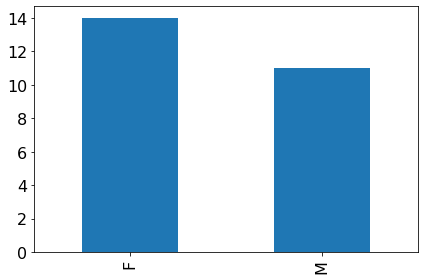

In [144]:
alunos["Sexo"][alunos["Curso"]!= "SS"].value_counts().plot(kind='bar', fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.savefig("sexo_jn_bar.png")

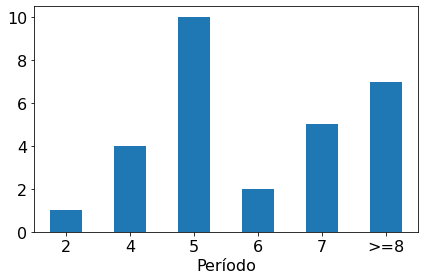

In [145]:
#alunos['Período'].value_counts().plot(kind='bar')
alunos.groupby('Período').size().plot(kind='bar', fontsize=16)
plt.xlabel("Período", fontsize=16)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("periodo_all.png")

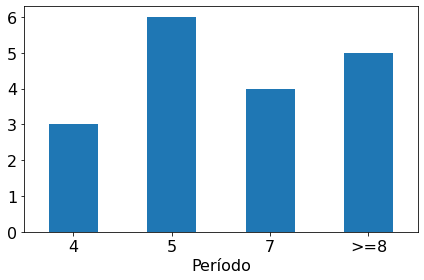

In [87]:
#alunos['Período'].value_counts().plot(kind='bar')
alunos[alunos["Curso"]!= "JN"].groupby('Período').size().plot(kind='bar', fontsize=16)
plt.xlabel("Período", fontsize=16)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("periodo_ss.png")

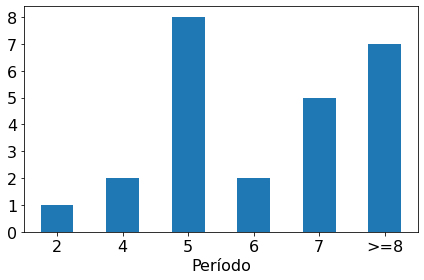

In [89]:
#alunos['Período'].value_counts().plot(kind='bar')
alunos[alunos["Curso"]!= "SS"].groupby('Período').size().plot(kind='bar', fontsize=16)
plt.xlabel("Período", fontsize=16)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("periodo_jn.png")

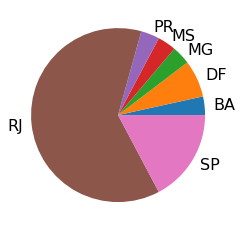

In [131]:
alunos.groupby('UF').size().plot(kind='pie', fontsize=16)#, colormap="prism")
plt.ylabel("")
plt.savefig("uf_all.png")

In [155]:
alunos.groupby('UF').size()

UF
BA     1
DF     2
MG     1
MS     1
PR     1
RJ    18
SP     5
dtype: int64

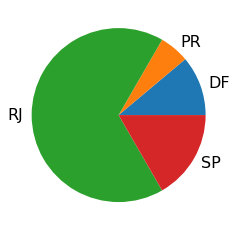

In [94]:
alunos[alunos["Curso"]!= "JN"].groupby('UF').size().plot(kind='pie', fontsize=16)
plt.ylabel("")
plt.savefig("uf_ss.png")

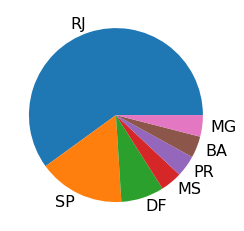

In [159]:
alunos["UF"][alunos["Curso"]!= "SS"].value_counts().plot(kind='pie', fontsize=16)
#alunos[alunos["Curso"]!= "SS"].groupby('UF').size().plot(kind='pie', fontsize=16)
plt.ylabel("")
plt.savefig("uf_jn.png")

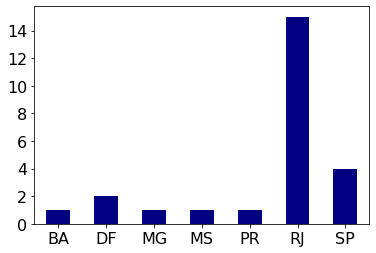

In [135]:
alunos[alunos["Curso"]!= "SS"].groupby('UF').size().plot(kind='bar', fontsize=16, colormap='jet')
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0)
#plt.savefig("uf_jn.png")

In [95]:
estados = pd.read_csv("../Municipios-Brasileiros/csv/estados.csv")

In [96]:
estados.columns

Index(['codigo_uf', 'uf', 'nome', 'latitude', 'longitude'], dtype='object')

In [97]:
estados.rename(columns={"uf":"UF", "nome":"Estado"}, inplace=True)
estados

,codigo_uf,UF,Estado,latitude,longitude
0,11,RO,Rondônia,-10.83,-63.34
1,12,AC,Acre,-8.77,-70.55
2,13,AM,Amazonas,-3.47,-65.10
3,14,RR,Roraima,1.99,-61.33
4,15,PA,Pará,-3.79,-52.48
5,16,AP,Amapá,1.41,-51.77
6,17,TO,Tocantins,-9.46,-48.26
7,21,MA,Maranhão,-5.42,-45.44
8,22,PI,Piauí,-6.60,-42.28
9,23,CE,Ceará,-5.20,-39.53


In [98]:
alunos = pd.merge(alunos, estados, on="UF")

In [99]:
alunos

,Nome,Sexo,Instituição,Área,Período,UF,Science Server,Jupyter Notebook,Curso,codigo_uf,Estado,latitude,longitude
0,Amanda Martins de Oliveira,F,UFRJ,Astronomia,>=8,RJ,True,True,2,33,Rio de Janeiro,-22.25,-42.66
1,Ana Catarina Pereira de Macedo,F,UFRJ,Astronomia,5,RJ,False,True,JN,33,Rio de Janeiro,-22.25,-42.66
2,Andreia Araujo Dourado,F,UFRJ,Astronomia,>=8,RJ,True,True,2,33,Rio de Janeiro,-22.25,-42.66
3,Bruno Henrique,M,IFRJ,Física,4,RJ,False,True,JN,33,Rio de Janeiro,-22.25,-42.66
4,Feliphe de Souza Ferreira,M,ON,Astronomia,>=8,RJ,False,True,JN,33,Rio de Janeiro,-22.25,-42.66
5,Francielle Maria Antônio Silva,F,UFRJ,Astronomia,7,RJ,False,True,JN,33,Rio de Janeiro,-22.25,-42.66
6,Gabriel da Silva Moreira Teixeira,M,UFRJ,Astronomia,7,RJ,True,True,2,33,Rio de Janeiro,-22.25,-42.66
7,Giovanna Liberato Cezar,F,UFRJ,Astronomia,5,RJ,True,True,2,33,Rio de Janeiro,-22.25,-42.66
8,Icaro de Oliveira Ramos,M,CSV,Física,5,RJ,False,True,JN,33,Rio de Janeiro,-22.25,-42.66
9,Jezebel Santos de Oliveira,F,UFRJ,Astronomia,7,RJ,True,True,2,33,Rio de Janeiro,-22.25,-42.66


In [114]:
m = folium.Map(location=rj, zoom_start=5, tiles="Stamen Terrain")
for index, row in alunos.iterrows():
    folium.Marker(location=[row.latitude, row.longitude]).add_to(m)

In [115]:
m

In [ ]:
alunos["UF"].value_counts()

In [ ]:
for i in alunos["UF"].value_counts():
    print(i)#, alunos[index]["UF"]])

In [ ]:
coord = [alunos.loc[0]['latitude'], alunos.loc[0]['longitude']]